In [2]:
import numpy as np
import matplotlib.pyplot as plt

# if you edit the function you need to run these lines again otherwise it won't be updated in this notebook
import importlib, plotting_functions
importlib.reload(plotting_functions) 
from plotting_functions import plot_opinions

In [3]:
# for a in agents:
def one_step(agent, agents):

    selected = np.where(np.abs(agents - agent) <= R)[0]
    update = np.average(agents[selected])
    
    return update

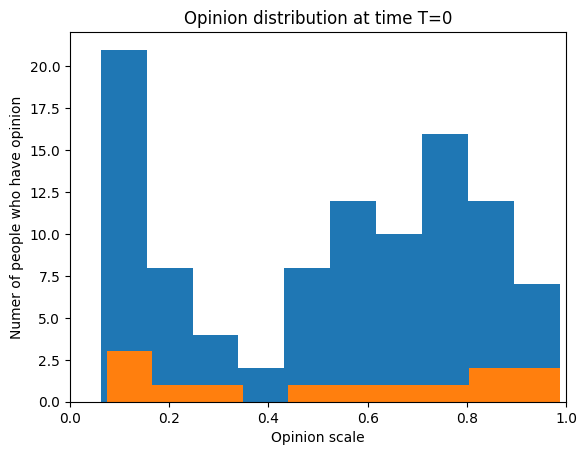

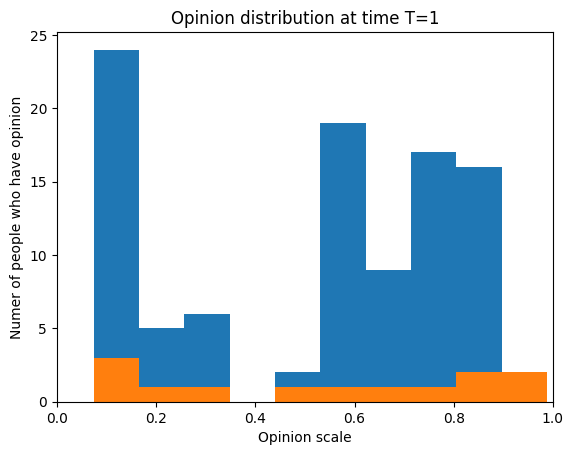

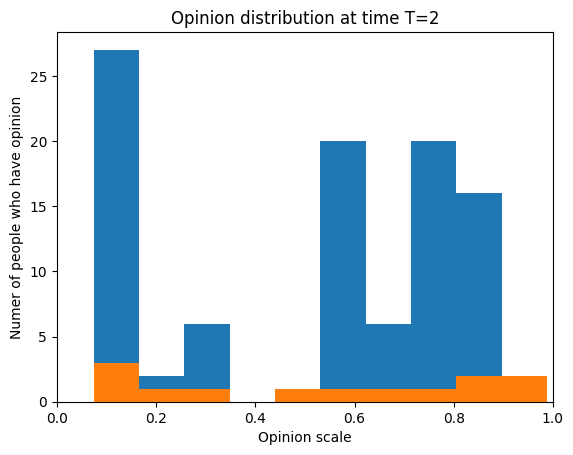

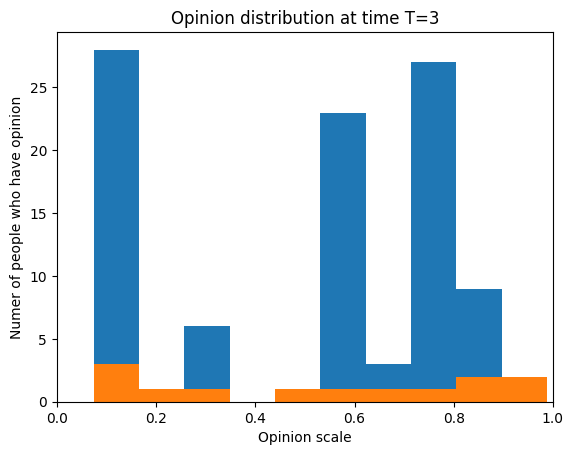

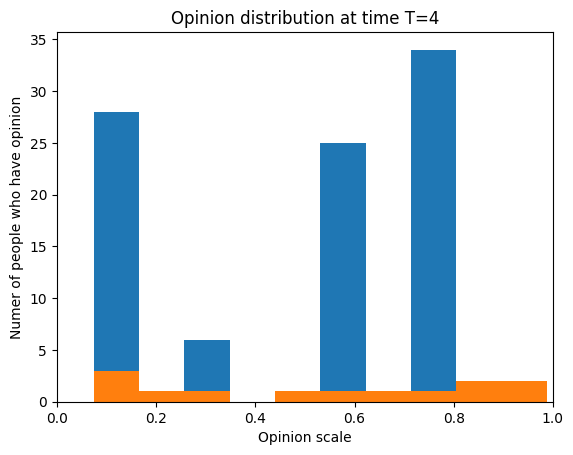

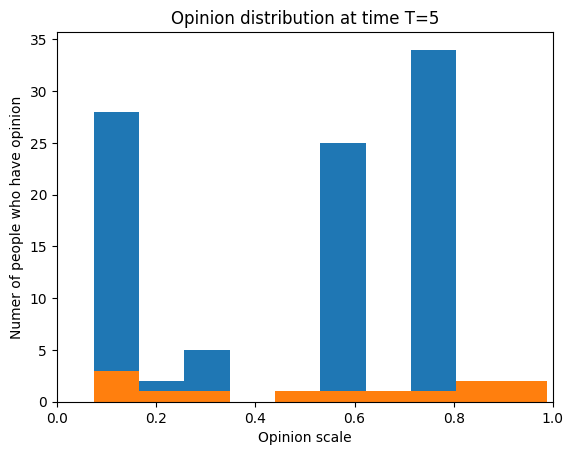

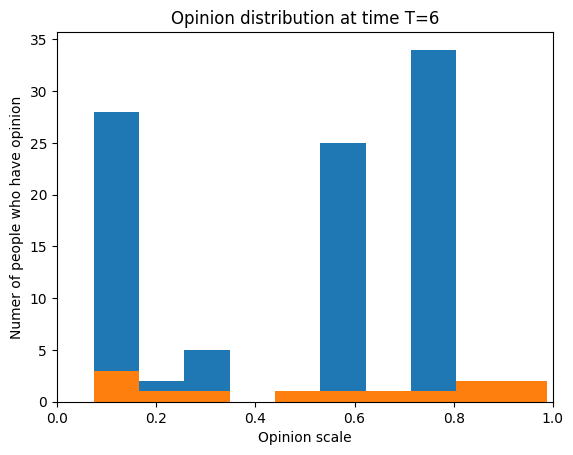

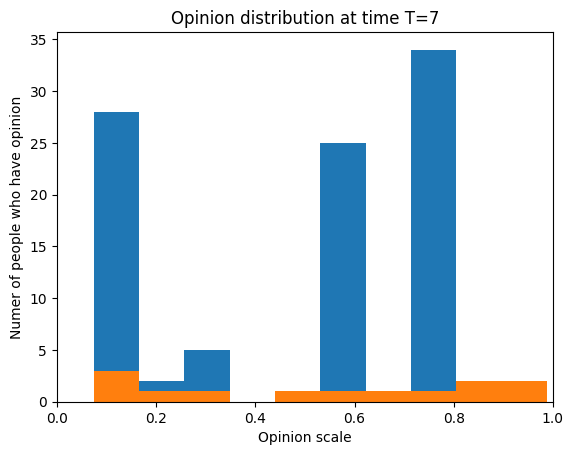

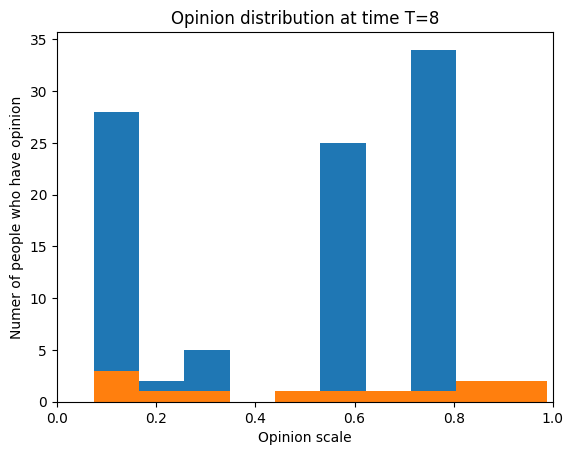

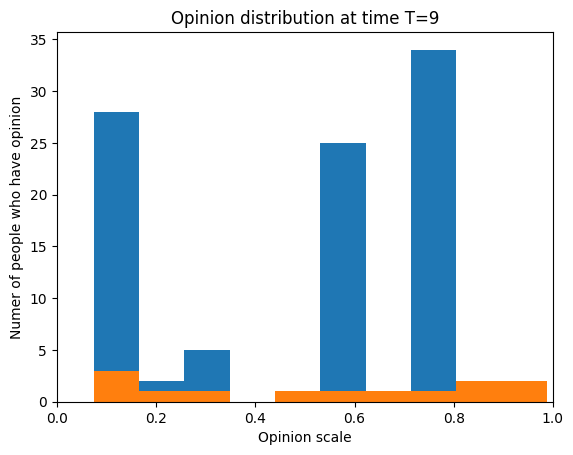

In [ ]:
#inital state variables

n = 1000 #number of agents
m = 0 # number of advertisers
R = 0.1 #opinion condfidance bound

rounds = 10

#initialize the agents
agents = np.random.uniform(0, 1, n)
agents_initial = np.copy(agents) 

advertisers = [2,5,10,12,32,45,50,61,74,88,91,93,99]
# agents[advertisers] = 0.5

#initialize array to store opinions over time
agents_history = np.zeros((rounds+1, n))
agents_history[0, :] = agents

#do t time steps (main loop)
for r in range(rounds):

    #make a temp list of agents
    agents_next = np.zeros(n)

    #loop over all agents
    for i, a in enumerate(agents):
        if i in advertisers:
            agents_next[i] = agents[i]
        else:
            agents_next[i] = one_step(a, agents)

    #update the agents list
    agents = np.copy(agents_next)
    agents_history[r+1, :] = agents


    plt.hist(agents)
    plt.hist(agents[advertisers])
    plt.xlabel('Opinion scale')
    plt.ylabel('Numer of people who have opinion')
    plt.title(f"Opinion distribution at time T={r}")
    plt.xlim(0,1)
    plt.show()


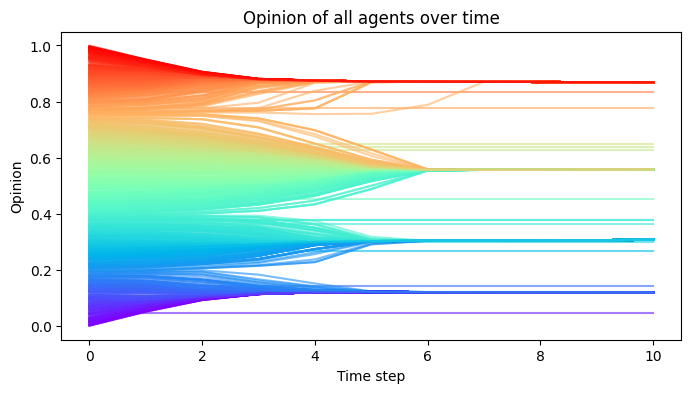

In [22]:
plot_opinions(agents_history, agents_initial, rounds, alpha=0.6)

In [16]:
#inital state variables

n = 100 #number of agents
m = 0 # number of advertisers
R = 0.1 #opinion condfidance bound

rounds = 20

#initialize the agents
agents = np.random.uniform(0, 1, n)
agents_initial = np.copy(agents) 

advertisers = [2,5,10,12,32,45,50,61,74,88,91,93,99]
# agents[a for a in advertisers a % 2 == 0] = 0.2
# agents[advertisers % 2 != 0] = 0.5
agents[advertisers] = 0.2

#initialize array to store opinions over time
agents_history = np.zeros((rounds+1, n))
agents_history[0, :] = agents

#do t time steps (main loop)
for r in range(rounds):

    #make a temp list of agents
    agents_next = np.zeros(n)

    #loop over all agents
    for i, a in enumerate(agents):
        if i in advertisers:
            # agents_next[i] = agents[i] + (one_step(a,agents) - agents[i]) / 2
            # agents_next[i] = agents[i] + np.abs(one_step(a,agents) - agents[i]) / 2
            if r % 5 == 0:
                if agents[i] < 1:
                    # agents_next[i] = agents[i] + np.abs(one_step(a,agents) - agents[i]) / 2
                    agents_next[i] = agents[i] + 0.05
                else:
                    agents_next[i] = agents[i]
            else:
                agents_next[i] = agents[i]
        else:
            agents_next[i] = one_step(a, agents)

    #update the agents list
    agents = np.copy(agents_next)
    agents_history[r+1, :] = agents


    # plt.hist(agents)
    # plt.hist(agents[advertisers])
    # plt.xlabel('Opinion scale')
    # plt.ylabel('Numer of people who have opinion')
    # plt.title(f"Opinion distribution at time T={r}")
    # plt.xlim(0,1)
    # plt.show()


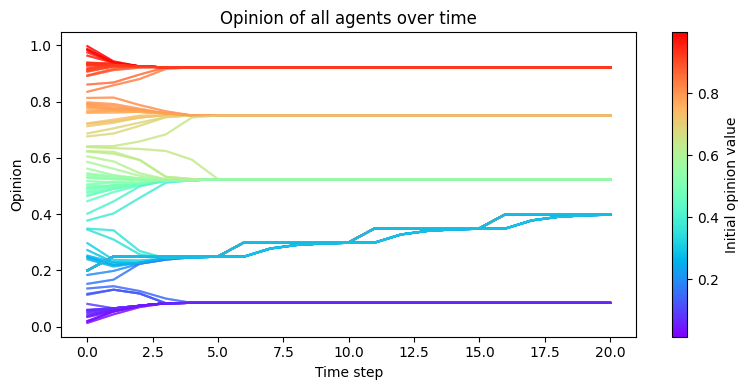

In [17]:
plot_opinions(agents_history, agents_initial, rounds, alpha=0.6)

***Chance to not accept the new opinion***

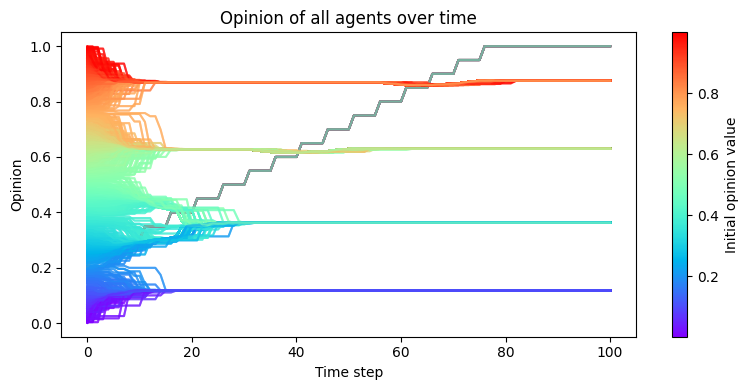

In [30]:
# for a in agents:
def one_step(agent, agents):

    selected = np.where(np.abs(agents - agent) <= R)[0]
    update = np.average(agents[selected])
    
    return update

#inital state variables

n = 1000 #number of agents
m = 0 # number of advertisers
R = 0.1 #opinion condfidance bound

rounds = 100

#initialize the agents
agents = np.random.uniform(0, 1, n)
agents_initial = np.copy(agents) 

advertisers = [2,5,10,12,32,45,50,61,74,88,91,93,99]
# agents[a for a in advertisers a % 2 == 0] = 0.2
# agents[advertisers % 2 != 0] = 0.5
agents[advertisers] = 0.2

#initialize array to store opinions over time
agents_history = np.zeros((rounds+1, n))
agents_history[0, :] = agents

#do t time steps (main loop)
for r in range(rounds):

    #make a temp list of agents
    agents_next = np.zeros(n)

    #loop over all agents
    for i, a in enumerate(agents):
        if i in advertisers:
            if r % 5 == 0:
                if agents[i] < 1:
                    agents_next[i] = agents[i] + 0.05
                else:
                    agents_next[i] = agents[i]
            else:
                agents_next[i] = agents[i]
        # Trying to model stubourness so theres a chance that each agent doesnt update 
        elif np.random.uniform()>0.5:
            agents_next[i] = one_step(a, agents)
        else:
            agents_next[i] = agents[i]

    #update the agents list
    agents = np.copy(agents_next)
    agents_history[r+1, :] = agents

plot_opinions(agents_history, agents_initial, rounds, alpha=0.6)

***Random confidence range***

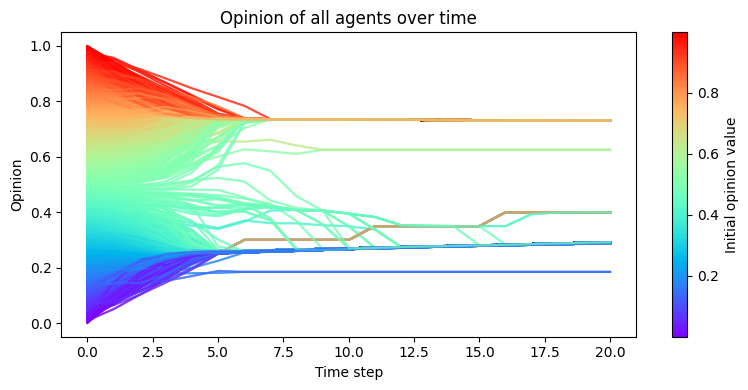

In [27]:
# for a in agents:
def one_step(i, agents, R):
    
    selected = np.where(np.abs(agents - agents[i]) <= R[(i-1)])[0]
    update = np.average(agents[selected])
    
    return update

#inital state variables

n = 1000 #number of agents
m = 0 # number of advertisers

max = 0.25
min = 0.05

R = np.random.normal((min+max)/2, 0.04, n) #opinion condfidance bound
rounds = 20

#initialize the agents
agents = np.random.uniform(0, 1, n)
agents_initial = np.copy(agents) 

advertisers = [2,5,10,12,32,45,50,61,74,88,91,93,99]

agents[advertisers] = 0.2

#initialize array to store opinions over time
agents_history = np.zeros((rounds+1, n))
agents_history[0, :] = agents

#do t time steps (main loop)
for r in range(rounds):

    #make a temp list of agents
    agents_next = np.zeros(n)

    #loop over all agents
    for i, a in enumerate(agents):
        if i in advertisers:
            # agents_next[i] = agents[i] + (one_step(a,agents) - agents[i]) / 2
            # agents_next[i] = agents[i] + np.abs(one_step(a,agents) - agents[i]) / 2
            if r % 5 == 0:
                if agents[i] < 1:
                    # agents_next[i] = agents[i] + np.abs(one_step(a,agents) - agents[i]) / 2
                    agents_next[i] = agents[i] + 0.05
                else:
                    agents_next[i] = agents[i]
            else:
                agents_next[i] = agents[i]
        else:
            agents_next[i] = one_step(i, agents, R)

    #update the agents list
    agents = np.copy(agents_next)
    agents_history[r+1, :] = agents

plot_opinions(agents_history, agents_initial, rounds, alpha=0.6)

***Both***

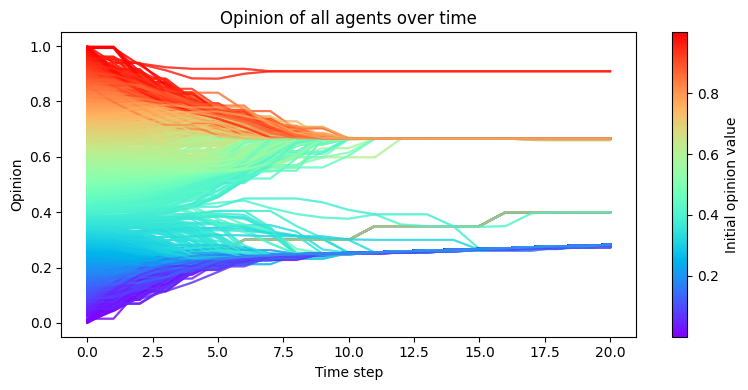

In [28]:
# for a in agents:
def one_step(i, agents, R):
    
    selected = np.where(np.abs(agents - agents[i]) <= R[(i-1)])[0]
    update = np.average(agents[selected])
    
    return update

#inital state variables

n = 1000 #number of agents
m = 0 # number of advertisers

max = 0.25
min = 0.05

R = np.random.normal((min+max)/2, 0.04, n) #opinion condfidance bound
rounds = 20

#initialize the agents
agents = np.random.uniform(0, 1, n)
agents_initial = np.copy(agents) 

advertisers = [2,5,10,12,32,45,50,61,74,88,91,93,99]

agents[advertisers] = 0.2

#initialize array to store opinions over time
agents_history = np.zeros((rounds+1, n))
agents_history[0, :] = agents

#do t time steps (main loop)
for r in range(rounds):

    #make a temp list of agents
    agents_next = np.zeros(n)

    #loop over all agents
    for i, a in enumerate(agents):
        if i in advertisers:
            # agents_next[i] = agents[i] + (one_step(a,agents) - agents[i]) / 2
            # agents_next[i] = agents[i] + np.abs(one_step(a,agents) - agents[i]) / 2
            if r % 5 == 0:
                if agents[i] < 1:
                    # agents_next[i] = agents[i] + np.abs(one_step(a,agents) - agents[i]) / 2
                    agents_next[i] = agents[i] + 0.05
                else:
                    agents_next[i] = agents[i]
            else:
                agents_next[i] = agents[i]
        elif np.random.uniform()>0.1:
            agents_next[i] = one_step(i,agents, R)
        else:
            agents_next[i] = agents[i]

    #update the agents list
    agents = np.copy(agents_next)
    agents_history[r+1, :] = agents

plot_opinions(agents_history, agents_initial, rounds, alpha=0.6)